# Monte Carlo - Descriterização de Euler

In [ ]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
ticker = 'CIEL3.SA'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2010-1-1', end='2015-6-30')['Adj Close']

In [31]:
log_returns = np.log(1 + data.pct_change())

In [32]:
r = 0.023 # taxa livre de risco

In [33]:
std = log_returns.std() * 250 ** 0.5
std = std.values

# Desvio padrão do retorno logaritimico anual

In [69]:
T = 1.0 # 1 ano a frente
t_intervals = 250 # numero de dias de negociação em 1 ano
delta_t = T / t_intervals

iterations = 1000 # quantidade de vezes da simua

In [70]:
Z = np.random.standard_normal((t_intervals + 1, iterations))
S = np.zeros_like(Z)
S0 = data.iloc[-1]
S[0] = S0

In [71]:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * std ** 2) * delta_t + std * delta_t ** 0.5 * Z[t])

In [72]:
S

array([[23.91634369, 23.91634369, 23.91634369, ..., 23.91634369,
        23.91634369, 23.91634369],
       [23.50861088, 23.57158908, 23.50281126, ..., 23.3463372 ,
        23.70256398, 23.99268306],
       [23.55620946, 24.08096272, 23.79286385, ..., 23.08957543,
        23.38259858, 23.77048826],
       ...,
       [16.33868623, 27.45722478, 19.59832615, ..., 26.94665713,
        22.25368221, 21.88488084],
       [16.67716798, 27.81632827, 18.99622795, ..., 27.13828558,
        22.56663646, 23.00186212],
       [16.17902778, 27.21618469, 19.01372125, ..., 26.9500807 ,
        21.80745828, 22.33467828]])

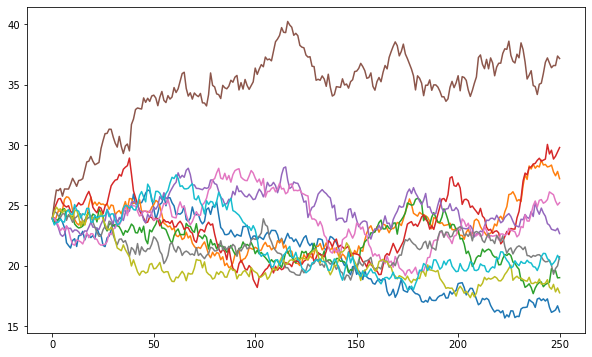

In [73]:
plt.figure(figsize=(10,6))
plt.plot(S[:, :10]);

# Pay off

Opção de compra

Compra se: S - K > 0

Não compra se: S - K < 0

In [76]:
p = np.maximum(S[-1] - 5.37, 0)

In [77]:
C = np.exp(-r * T) * np.sum(p) / iterations
C

18.970923533356075